<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Scikit_learn_RandomForest(RF)_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Random Forest Classification**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=sns.load_dataset('penguins')

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###**Feature Engineering**

####Transfering categorical data into numeric (**One Hot Encoding**)

In [ ]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
 pd.get_dummies(df['sex']).head()

,Female,Male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


Use single Column, here only male

In [ ]:
sex=pd.get_dummies(df['sex'], drop_first=True)

In [ ]:
sex.head()

,Male
0,1
1,0
2,0
4,0
5,1


Applying One Hot Encoding to Island feature

In [ ]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
pd.get_dummies(df['island']).head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [ ]:
island=pd.get_dummies(df['island'], drop_first=True)

In [ ]:
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Dream']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Dream'}, axis=1)
              .sort_values('Dream', ascending=True))
  xs = counted['Dream']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Dream', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Dream')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Torgersen']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Torgersen'}, axis=1)
              .sort_values('Torgersen', ascending=True))
  xs = counted['Torgersen']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Torgersen', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Torgersen')
_ = plt.ylabel('count()')

Adding the two dataframes sex and island

In [ ]:
new_data=pd.concat([df,island,sex],axis=1)

In [ ]:
new_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [ ]:
new_data.drop(['island','sex'], axis=1,inplace=True)

In [ ]:
new_data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


**Creating seperate teaget variables**

In [ ]:
Y=new_data.species

In [ ]:
Y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [ ]:
Y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
#using map function to convert categorical data into numeric
Y=Y.map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})

In [ ]:
Y.tail(10)

332    2
333    2
334    2
335    2
337    2
338    2
340    2
341    2
342    2
343    2
Name: species, dtype: int64

In [ ]:
#Dropping the target variable species from dataframe
new_data.drop('species', inplace=True, axis=1)

In [ ]:
new_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [ ]:
X=new_data

**Splitting the data sets into TRAINING and TEST data sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (233, 7)
X_test (100, 7)
Y_train (233,)
Y_test (100,)


In [ ]:
#Training the data set using the random forest

from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
Classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

**Prediction**

In [ ]:
#predecting the result
y_pred = Classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cn = confusion_matrix(y_test,y_pred)
print(cn)

[[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]


In [ ]:
accuracy_score(y_test,y_pred)

0.98

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
 #Try with different number of trees and gini criteria
 from sklearn.ensemble import RandomForestClassifier
 Classifier = RandomForestClassifier(n_estimators = 7, criterion = 'gini', random_state = 0)
 Classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

In [ ]:
y_pred = Classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.99

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [ ]:
x,y = make_classification(n_features = 6, n_redundant = 0, n_informative =  6, n_clusters_per_class=1)
df = pd.DataFrame(x, columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])
df['target']=y
print(df.shape)
df.head()

(100, 7)


,col1,col2,col3,col4,col5,col6,target
0,1.185312,0.704704,1.698886,-1.608372,-1.398718,-0.713151,1
1,1.409362,3.037421,0.220894,-0.538379,-1.546938,-1.144388,1
2,1.766705,0.822001,1.148743,-2.512742,3.830885,-1.245134,0
3,1.665849,1.501191,0.661550,-0.917660,3.160579,-1.828614,0
4,0.442674,2.196329,-1.490472,-1.129173,0.180510,-1.551857,1


In [ ]:
#function for row sampling

def sample_row(df, percent):
  return df.sample(int(percent*df.shape[0]), replace =True)

In [ ]:
#function for feature sampling
def sample_features(df, percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target']=df['target']
  return new_df


In [ ]:
#function for combined samples
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_row(df,row_percent)
  return sample_features(new_df, col_percent)

In [ ]:
df1 = sample_row(df,0.2)

In [ ]:
df2 = sample_row(df,0.2)

In [ ]:
df3 = sample_row(df,0.2)

In [ ]:
df3.shape

(20, 7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:6], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:6], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:6], df3.iloc[:,-1])

DecisionTreeClassifier()

###**Gini**
-The Gini Index is a way of quantifying how messy or clean a dataset is, especially when we use decision trees to classify it. It goes from 0 (cleanest, all data points have the same label) to 1 (messiest, data points are split evenly among all labels).

[Text(0.5555555555555556, 0.875, 'x[4] <= 0.464\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.21\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= -0.422\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 0.22\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

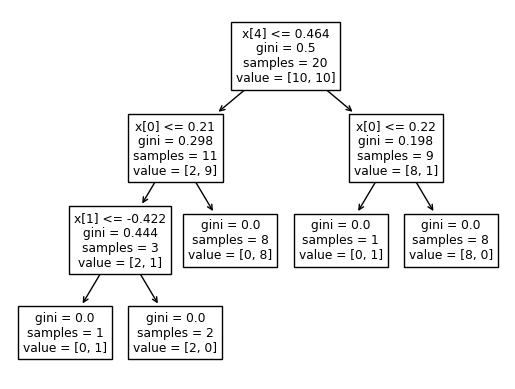

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.4, 0.9, 'x[5] <= -1.704\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.7, 'x[3] <= -0.168\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3, 0.5, 'x[0] <= 2.202\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.7, 'x[0] <= -0.999\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.185\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.3, 'x[4] <= -0.042\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

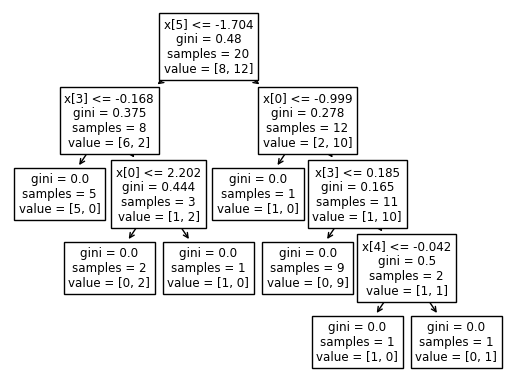

In [ ]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.267\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.4, 0.5, 'x[4] <= 0.637\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

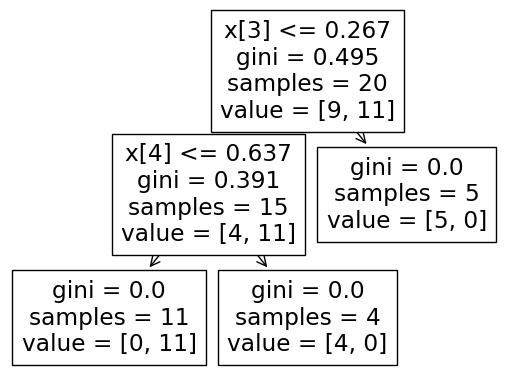

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([1.185312,	0.704704,	1.698886,	-1.608372,	-1.398718,	-0.713151]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([1.185312,	0.704704,	1.698886,	-1.608372,	-1.398718,	-0.713151]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([1.185312,	0.704704,	1.698886,	-1.608372,	-1.398718,	-0.713151]).reshape(1,6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
f1 = sample_features(df, 0.5)

<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [ ]:
f1

,col1,col4,col2,target
0,1.185312,-1.608372,0.704704,1
1,1.409362,-0.538379,3.037421,1
2,1.766705,-2.512742,0.822001,0
3,1.665849,-0.917660,1.501191,0
4,0.442674,-1.129173,2.196329,1
...,...,...,...,...
95,-2.233680,-4.507381,-0.328699,0
96,0.315588,-1.870028,-3.963691,1
97,-0.928514,1.217300,0.269944,0
98,1.842032,0.916572,2.561680,1


In [ ]:
f2 = sample_features(df, 0.5)
f3 = sample_features(df, 0.5)

<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [ ]:
print(f1.columns)
print(f2.columns)
print(f3.columns)

Index(['col1', 'col4', 'col2', 'target'], dtype='object')
Index(['col6', 'col5', 'col3', 'target'], dtype='object')
Index(['col3', 'col5', 'col1', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(f1.iloc[:,0:3], f1.iloc[:,-1])
clf2.fit(f2.iloc[:,0:3], f2.iloc[:,-1])
clf3.fit(f3.iloc[:,0:3], f3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.39351851851851855, 0.9545454545454546, 'x[0] <= 2.273\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.35648148148148145, 0.8636363636363636, 'x[0] <= -0.535\ngini = 0.497\nsamples = 91\nvalue = [42, 49]'),
 Text(0.3194444444444444, 0.7727272727272727, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.39351851851851855, 0.7727272727272727, 'x[1] <= 1.819\ngini = 0.484\nsamples = 83\nvalue = [34, 49]'),
 Text(0.35648148148148145, 0.6818181818181818, 'x[2] <= -1.232\ngini = 0.475\nsamples = 80\nvalue = [31, 49]'),
 Text(0.1111111111111111, 0.5909090909090909, 'x[0] <= 1.308\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.07407407407407407, 0.5, 'x[0] <= 0.66\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.1111111111111111, 0.4090909090909091, 'x[2] <= -2.849\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07407407407407407, 0.3181818181818182, 'gini = 0.0\nsa

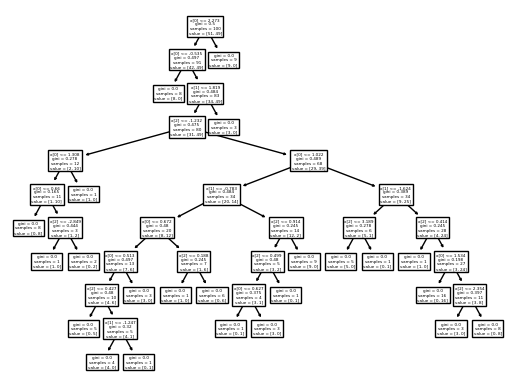

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.4600694444444444, 0.95, 'x[1] <= -0.902\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.125, 0.85, 'x[2] <= -1.447\ngini = 0.298\nsamples = 33\nvalue = [6, 27]'),
 Text(0.09722222222222222, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1527777777777778, 0.75, 'x[0] <= -1.541\ngini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(0.05555555555555555, 0.65, 'x[1] <= -1.082\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.027777777777777776, 0.55, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.08333333333333333, 0.55, 'x[0] <= -3.255\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1111111111111111, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.65, 'x[1] <= -2.279\ngini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.19444444444444445, 0.55, 'x[2] <= 3.441\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.45, 'gini = 0.0\nsam

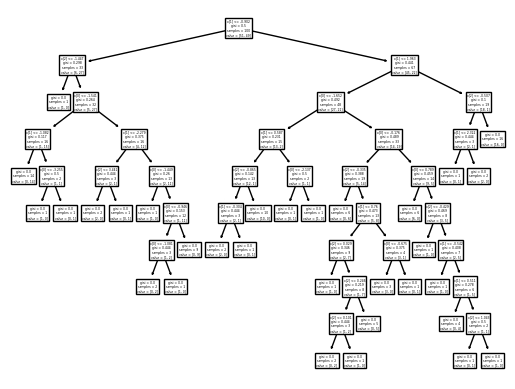

In [ ]:
plot_tree(clf2)

[Text(0.43478260869565216, 0.9545454545454546, 'x[1] <= -0.902\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.17391304347826086, 0.8636363636363636, 'x[2] <= -0.496\ngini = 0.298\nsamples = 33\nvalue = [6, 27]'),
 Text(0.13043478260869565, 0.7727272727272727, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.21739130434782608, 0.7727272727272727, 'x[2] <= 2.358\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.17391304347826086, 0.6818181818181818, 'x[1] <= -1.271\ngini = 0.18\nsamples = 30\nvalue = [3, 27]'),
 Text(0.08695652173913043, 0.5909090909090909, 'x[0] <= 1.931\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.13043478260869565, 0.5, 'x[0] <= 2.182\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.08695652173913043, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.4090909090909091, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Tex

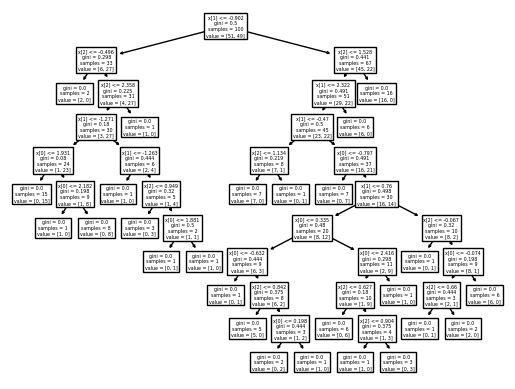

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([1.766705,	-2.512742,	0.822001	]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf2.predict(np.array([1.766705,	-2.512742,	0.822001	]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([1.766705,	-2.512742,	0.822001	]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
combined_sampling(df, 0.5, 0.5).shape

<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


(50, 4)

In [ ]:
cf1 = combined_sampling(df, 0.5, 0.5)
cf2 = combined_sampling(df, 0.5, 0.5)
cf3 = combined_sampling(df, 0.5, 0.5)

<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']
<ipython-input-116-2260f4a9e5a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(cf1.iloc[:,0:3], cf1.iloc[:,-1])
clf2.fit(cf2.iloc[:,0:3], cf2.iloc[:,-1])
clf3.fit(cf3.iloc[:,0:3], cf3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4166666666666667, 0.9285714285714286, 'x[0] <= -1.271\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.5, 0.7857142857142857, 'x[0] <= 0.363\ngini = 0.382\nsamples = 35\nvalue = [26, 9]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[1] <= -1.704\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.25, 0.5, 'x[0] <= -1.106\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= -0.011\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[0] <= -0.297\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 

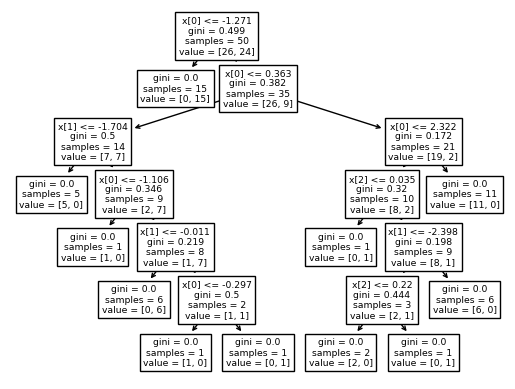

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf1)

[Text(0.6607142857142857, 0.9375, 'x[0] <= 1.604\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.4642857142857143, 0.8125, 'x[2] <= 0.519\ngini = 0.478\nsamples = 38\nvalue = [15, 23]'),
 Text(0.2857142857142857, 0.6875, 'x[2] <= 0.123\ngini = 0.497\nsamples = 24\nvalue = [13, 11]'),
 Text(0.14285714285714285, 0.5625, 'x[1] <= -2.03\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.07142857142857142, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.21428571428571427, 0.4375, 'x[1] <= 1.932\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.14285714285714285, 0.3125, 'x[2] <= -0.074\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.07142857142857142, 0.1875, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.21428571428571427, 0.1875, 'x[0] <= 0.4\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(

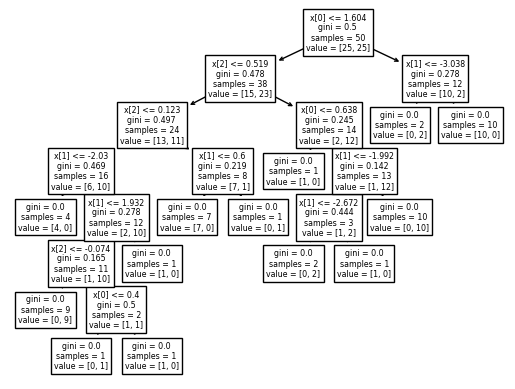

In [ ]:
plot_tree(clf2)

[Text(0.35714285714285715, 0.9285714285714286, 'x[0] <= -0.902\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.21428571428571427, 0.7857142857142857, 'x[2] <= 1.905\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.14285714285714285, 0.6428571428571429, 'x[0] <= -1.271\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.21428571428571427, 0.5, 'x[0] <= -1.13\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.7857142857142857, 'x[1] <= -1.196\ngini = 0.42\nsamples = 30\nvalue = [21, 9]'),
 Text(0.42857142857142855, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.5714285714285714, 0.64285714

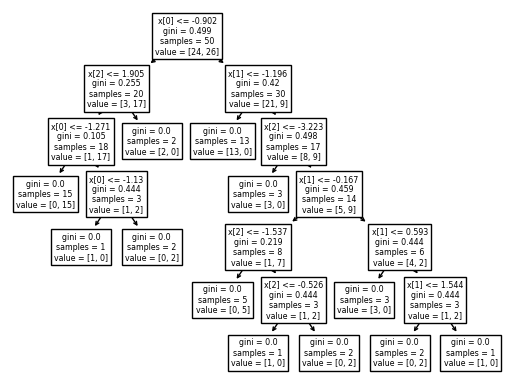

In [ ]:
plot_tree(clf3)

In [ ]:
cf1

,col5,col6,col1,target
44,-0.606956,-2.236959,-0.819109,0
84,-0.941163,-1.381166,0.195415,1
18,1.340378,-1.717485,1.565131,0
6,2.295595,-1.910811,0.029255,1
21,-2.159455,-3.789017,1.802680,1
59,0.389193,-3.933036,0.041743,0
49,2.215533,-2.788966,0.061873,0
64,0.166700,-3.213936,0.374014,0
47,-1.627446,-1.564406,0.831341,1
64,0.166700,-3.213936,0.374014,0


In [ ]:
clf1.predict(np.array([-0.941163,	-1.381166,	0.195415]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-0.941163,	-1.381166,	0.195415]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf3.predict(np.array([-0.941163,	-1.381166,	0.195415]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])